In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### About Dataset


In [4]:
#Credits to author of the dataset: https://data.world/anilsharma87 - Analyzing and Maximizing Online Business Performance
#By ANil 

# Project: E-Commerce Sales Forecasting

### Objective:

The goal of this project is to build a machine learning model that predicts future sales for an e-commerce business based on historical sales data. 
Sales forecasting is crucial for businesses to optimize inventory management, set realistic sales targets, and make data-driven decisions. 
Accurate forecasts can help reduce costs and maximize profits by anticipating future demand trends.

### Problem Definition:

I'm tasked with predicting the future sales volume for a given period (e.g., daily, weekly, or monthly) using a dataset that includes historical sales data from an e-commerce platform. 
The challenge is to account for seasonality, trends, and external factors that may influence sales, such as holidays, discounts, and other promotional activities.

### Key Assumptions and Factors to Explore:

1. **Trend and Seasonality:** 
   - Analyze whether sales exhibit long-term trends or seasonal patterns, such as increased sales during holidays or weekends.
   
2. **Price Influence:**
   - Investigate the relationship between price fluctuations and sales volume, examining how discounts or price increases impact consumer behavior.

3. **Promotional Activities:**
   - Assess the effect of promotions, discounts, and marketing campaigns on sales and how they can skew the forecast.

4. **Product Categories:**
   - Examine whether specific product categories exhibit different sales patterns compared to others.

### Approach:

1. **Exploratory Data Analysis (EDA):**
   - Perform an initial data exploration to understand the structure of the dataset, identify trends, and discover correlations between variables.

2. **Feature Engineering:**
   - Create new features such as day of the week, month, holidays, and other relevant factors that may affect sales.

3. **Model Selection:**
   - Train multiple forecasting models (e.g., Linear Regression, ARIMA, Prophet, XGBoost) to compare performance.
   - Evaluate models based on metrics like RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error).

4. **Forecasting:**
   - Generate future sales predictions based on the chosen model and validate accuracy using test data.

### Outcome:

The final output will be an accurate forecast model that can predict future sales, providing insights that are useful for business decision-making, such as inventory planning, staffing, and financial forecasting.

## Step 1: Data Loading

In [5]:
df = pd.read_csv('Amazon Sale Report.csv', low_memory=False)
df.head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


## Step 2: Initial Data Exploration and Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [7]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [8]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [9]:
df = df.drop(columns=['Unnamed: 22'])
# Drop unnecessary column 'Unnamed: 22'

In [10]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['fulfilled-by'].unique()

C:\Users\USER\AppData\Local\Temp\ipykernel_13576\824647721.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


array(['Easy Ship', nan], dtype=object)

In [11]:
# Replace 'nan' values in the 'fulfilled-by' column with 'Not Available'
df['fulfilled-by'] = df['fulfilled-by'].fillna('Not Available')


In [12]:
#  Drop rows with missing values in key columns such as 'Amount', 'currency', 'ship-city', 'ship-state', 'ship-country'
df = df.dropna(subset=['Amount', 'currency', 'ship-city', 'ship-state', 'ship-country'])
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         5133
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids         41691
B2B                       0
fulfilled-by              0
dtype: int64

In [13]:
# Replace 'nan' values in 'Courier Status' with 'Not Available'
df['Courier Status'] = df['Courier Status'].fillna('Not Available')
# Replace 'nan' values in 'promotion-ids' with 'No Promotion'
df['promotion-ids'] = df['promotion-ids'].fillna('No Promotion')

## Step 3. Exploratory Data Analysis

In [14]:
# Display basic statistics for numerical columns
print(df[['Qty', 'Amount']].describe())

                 Qty         Amount
count  121149.000000  121149.000000
mean        0.961246     648.573305
std         0.214327     281.222115
min         0.000000       0.000000
25%         1.000000     449.000000
50%         1.000000     605.000000
75%         1.000000     788.000000
max         8.000000    5584.000000


In [15]:
print(df[['Qty','Amount']].head(5))

   Qty  Amount
0    0  647.62
1    1  406.00
2    1  329.00
3    0  753.33
4    1  574.00


In [16]:
# Find rows where Qty is 0 and Amount is greater than 0
invalid_rows = df[(df['Qty']==0) & (df['Amount']> 0)]
print(invalid_rows)

         index             Order ID       Date     Status Fulfilment  \
0            0  405-8078784-5731545 2022-04-30  Cancelled   Merchant   
3            3  403-9615377-8133951 2022-04-30  Cancelled   Merchant   
23          23  404-6019946-2909948 2022-04-30  Cancelled   Merchant   
83          83  404-6522553-9345930 2022-04-30  Cancelled   Merchant   
178        178  171-1224053-5752314 2022-04-30  Cancelled   Merchant   
...        ...                  ...        ...        ...        ...   
128730  128730  403-2139190-8481165 2022-06-01  Cancelled   Merchant   
128761  128761  402-4651401-6366769 2022-06-01  Cancelled   Merchant   
128762  128762  402-4651401-6366769 2022-06-01  Cancelled   Merchant   
128875  128875  403-9524128-9243508 2022-06-01  Cancelled   Merchant   
128890  128890  407-0116398-1810752 2022-05-31  Cancelled   Merchant   

       Sales Channel  ship-service-level    Style             SKU  \
0           Amazon.in           Standard   SET389  SET389-KR-NP-S 

In [17]:
invalid_status_counts = invalid_rows['Status'].value_counts()
print(invalid_status_counts)

Status
Cancelled    5133
Name: count, dtype: int64


In [18]:
df_cleaned = df[df['Status'] != "Cancelled"]
removed_rows = len(df) - len(df_cleaned)
print(f"Removed {removed_rows} cancelled orders")


Removed 10761 cancelled orders


In [19]:
df = df_cleaned

In [20]:
df['Status'].unique()

array(['Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged'], dtype=object)

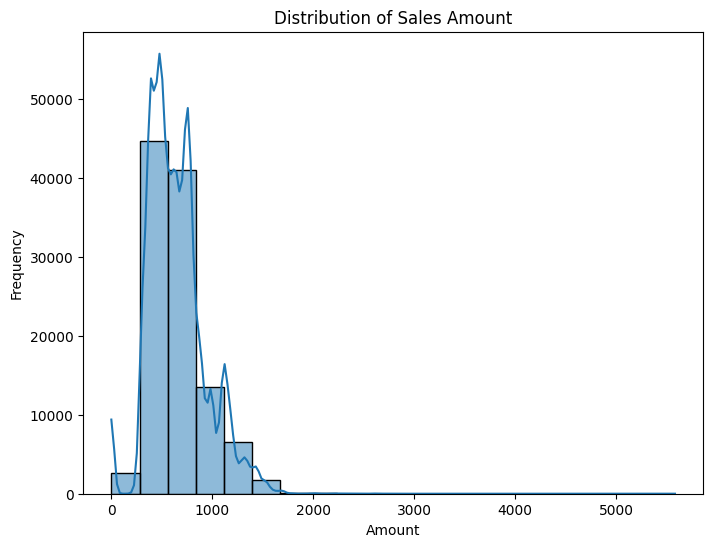

In [21]:
# Distribution of 'Amount' (sales)
plt.figure(figsize=(8,6))
sns.histplot(df['Amount'], bins=20, kde=True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

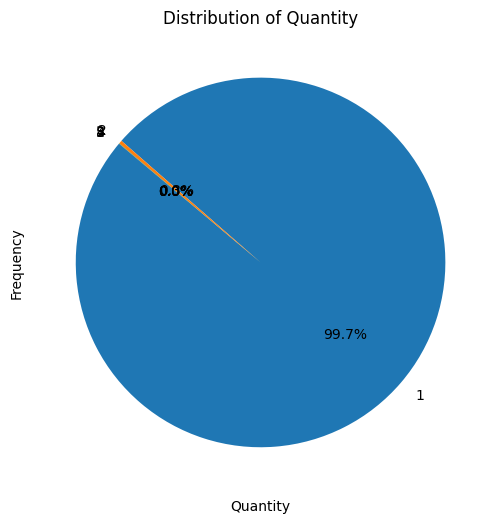

In [22]:
# Distribution of 'Qty' (quantity)
qty_counts = df['Qty'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(qty_counts, labels=qty_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

In [23]:
df['Qty'].value_counts()

Qty
1    110035
2       311
3        31
4         8
5         2
8         1
Name: count, dtype: int64

In [24]:
multiple_qty_sales = df[df['Qty'] > 1]


In [25]:
multiple_qty_sales['B2B'].value_counts()

B2B
False    342
True      11
Name: count, dtype: int64

In [26]:
## Group by date to analyze sales over time
df_grouped_by_date = df.groupby(df['Date'].dt.date)['Amount'].sum()

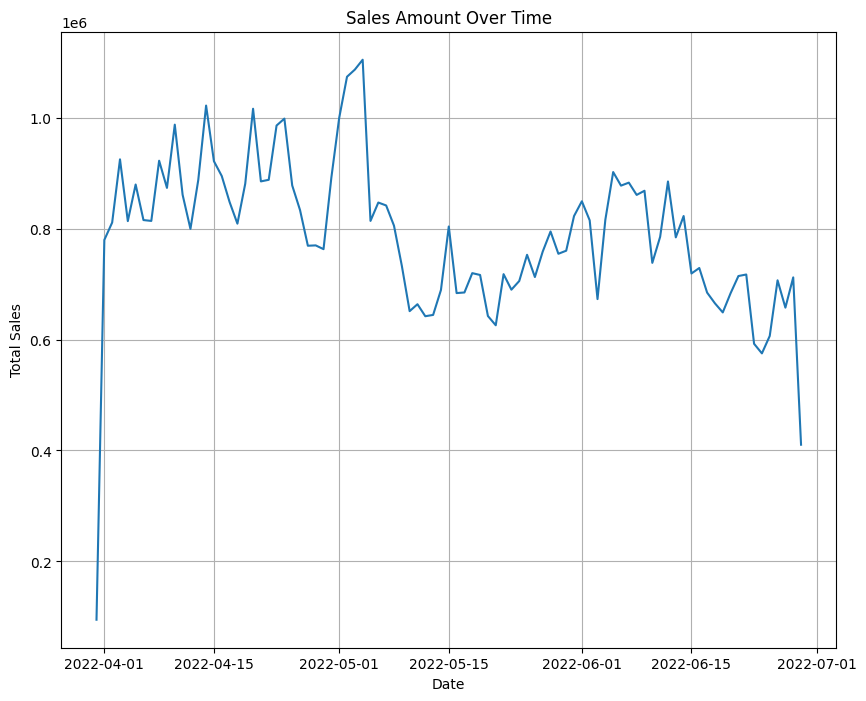

In [27]:
# Plot sales trends over time
plt.figure(figsize=(10,8))
df_grouped_by_date.plot()
plt.title('Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [28]:
## Group by category to see total sales by category
df_grouped_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

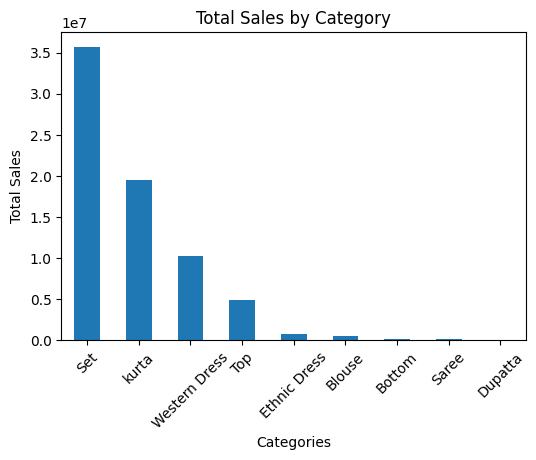

In [29]:
# Plot sales by category
plt.figure(figsize=(6,4))
df_grouped_by_category.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Categories')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Step 4: Analysis of Sales Trends

In [47]:
df['Month'] = df['Date'].dt.to_period('M')

In [48]:
monthly_sales = df.groupby('Month')['Amount'].sum()

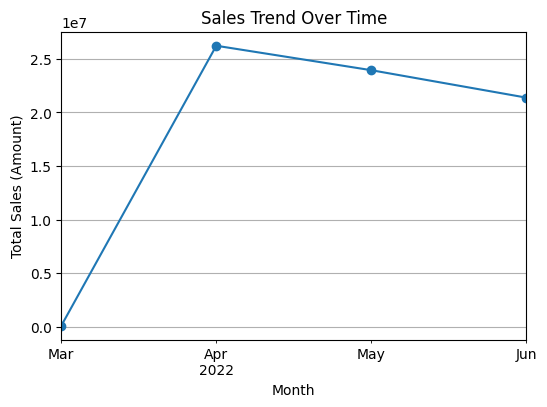

In [141]:
#Plot of Sales Trend on monthly basis
plt.figure(figsize=(6,4))
monthly_sales.plot(kind='line', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (Amount)')
plt.grid(True)
plt.show()

In [72]:
# Creating a 'Day' column
df.loc[:,'Day'] = df['Date'].dt.to_period('D')

In [75]:
df['Day'].unique()

<PeriodArray>
['2022-04-30', '2022-04-29', '2022-04-28', '2022-04-27', '2022-04-26',
 '2022-04-25', '2022-04-24', '2022-04-23', '2022-04-22', '2022-04-21',
 '2022-04-20', '2022-04-19', '2022-04-18', '2022-04-17', '2022-04-16',
 '2022-04-15', '2022-04-14', '2022-04-13', '2022-04-12', '2022-04-11',
 '2022-04-10', '2022-04-09', '2022-04-08', '2022-04-07', '2022-04-06',
 '2022-04-05', '2022-04-04', '2022-04-03', '2022-04-02', '2022-04-01',
 '2022-05-31', '2022-05-30', '2022-05-29', '2022-05-28', '2022-05-27',
 '2022-05-26', '2022-05-25', '2022-05-24', '2022-05-23', '2022-05-22',
 '2022-05-21', '2022-05-20', '2022-05-19', '2022-05-18', '2022-05-17',
 '2022-05-16', '2022-05-15', '2022-05-14', '2022-05-13', '2022-05-12',
 '2022-05-11', '2022-05-10', '2022-05-09', '2022-05-08', '2022-05-07',
 '2022-05-06', '2022-05-05', '2022-05-04', '2022-05-03', '2022-05-02',
 '2022-05-01', '2022-06-29', '2022-06-28', '2022-06-27', '2022-06-26',
 '2022-06-25', '2022-06-24', '2022-06-23', '2022-06-22', '2022-

In [31]:
# Creating a 'year' column
df['Year'] = df['Date'].dt.year


In [34]:
# Creating a 'day_of_week' column
df['day_of_week'] = df['Date'].dt.dayofweek #0 - Monday, 6-Sunday

In [77]:
df['day_of_week']

1         5
2         5
4         5
5         5
6         5
         ..
128970    1
128971    1
128972    1
128973    1
128974    1
Name: day_of_week, Length: 110236, dtype: int32

In [164]:
daily_sales = df.groupby('Day')['Amount'].sum()

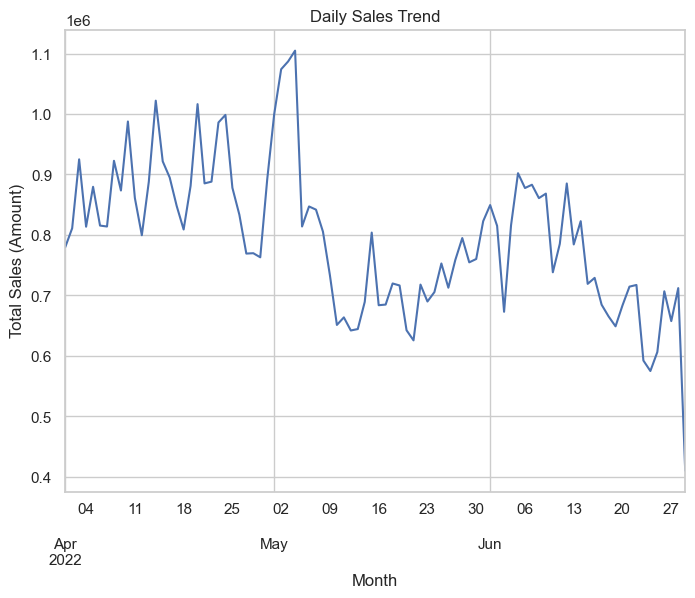

In [170]:
plt.figure(figsize=(8,6))
daily_sales.plot(kind='line')
plt.title('Daily Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (Amount)')
plt.grid(True)
plt.show()

In [102]:
df[df['Month'] == '2022-03']

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Month,Day
48879,48879,171-7326790-9044369,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,JNE3614,JNE3614-KR-L,kurta,...,453.0,ARANI TIRUVANNAMALAI DISTRICT,TAMIL NADU,632317.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Not Available,2022-03,2022-03-31
48880,48880,171-7326790-9044369,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,JNE3294,JNE3294-KR-L,kurta,...,353.0,ARANI TIRUVANNAMALAI DISTRICT,TAMIL NADU,632317.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Not Available,2022-03,2022-03-31
48882,48882,402-9467302-4929937,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-XXXL,kurta,...,449.0,PANCHKULA,HARYANA,134116.0,IN,No Promotion,False,Not Available,2022-03,2022-03-31
48883,48883,405-1392423-9557138,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,JNE3068,JNE3068-KR-A-L,kurta,...,688.0,Tirupati,ANDHRA PRADESH,517501.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Not Available,2022-03,2022-03-31
48884,48884,407-7904992-8992306,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,J0281,J0281-SKD-L,Set,...,1496.0,JAGALUR,KARNATAKA,577528.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Not Available,2022-03,2022-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49044,49044,406-6791822-4445124,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,J0151,J0151-KR-L,kurta,...,495.0,GHAZIABAD,UTTAR PRADESH,201002.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Not Available,2022-03,2022-03-31
49045,49045,406-6082415-9289960,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,SET131,SET131-KR-NP-A-XL,Set,...,567.0,NEW DELHI,DELHI,110025.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Not Available,2022-03,2022-03-31
49046,49046,171-2752302-3297130,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,SET187,SET187-KR-DH-M,Set,...,599.0,RANCHI,JHARKHAND,834004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Not Available,2022-03,2022-03-31
49047,49047,402-3547933-1598701,2022-03-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3822,JNE3822-KR-L,kurta,...,490.0,UDAIPUR,RAJASTHAN,313001.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2022-03,2022-03-31


### Based on the provided analysis we can discover, that having March as a whole month is making the dataset fragile - since we only have an access to the last day of March. Because of it, I've decided to drop the entire 'month' - 1 day in this case, to avoid it being an outlier. 

In [49]:
df = df[df['Date'] != '2022-03-31']

In [50]:
df['Month'].unique()

<PeriodArray>
['2022-04', '2022-05', '2022-06']
Length: 3, dtype: period[M]

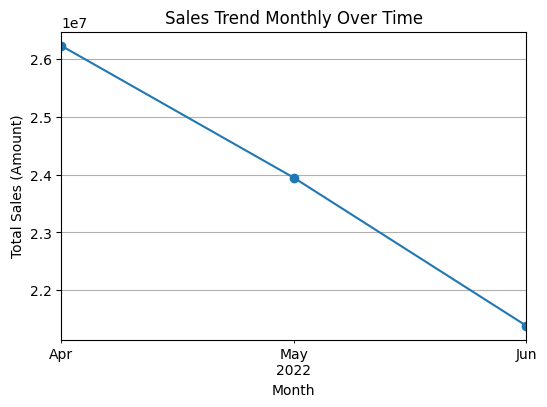

In [51]:
monthly_sales_wo_march = df.groupby('Month')['Amount'].sum()
plt.figure(figsize=(6,4))
monthly_sales_wo_march.plot(kind='line', marker='o')
plt.title('Sales Trend Monthly Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (Amount)')
plt.grid(True)
plt.show()

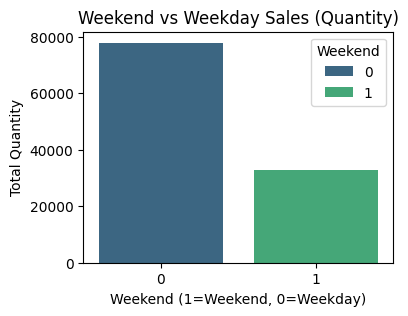

In [60]:
# Weekend vs Weekday Sales
plt.figure(figsize=(4,3))
sns.barplot(x='Weekend', y='Qty', data=df, estimator=sum, palette='viridis', hue='Weekend')
plt.title('Weekend vs Weekday Sales (Quantity)')
plt.xlabel('Weekend (1=Weekend, 0=Weekday)')
plt.ylabel('Total Quantity')
plt.show()

In [ ]:
# Group by 'Date' and sum up the relevant columns (Qty and Amount)
df_daily = df.groupby('Date').agg({
    'Qty': 'sum',   # Sum up quantities per day
    'Amount': 'sum' # Sum up revenue per day
}).reset_index()

In [ ]:
# Extract the day of the week and day category (weekday/weekend) for the unique dates
df_daily['day_of_week'] = df_daily['Date'].dt.day_name()
df_daily['day_category'] = df_daily['Date'].dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [95]:
df_daily.head()

,Date,Qty,Amount,day_of_week,day_category
0,2022-04-01,1237,779737.0,Friday,Weekday
1,2022-04-02,1302,811110.0,Saturday,Weekend
2,2022-04-03,1453,925049.0,Sunday,Weekend
3,2022-04-04,1270,813708.0,Monday,Weekday
4,2022-04-05,1416,879694.0,Tuesday,Weekday


In [96]:
df_daily['day_category'].value_counts()

day_category
Weekday    64
Weekend    26
Name: count, dtype: int64

In [105]:
sum_sales = df_daily.groupby('day_category').agg({
    'Qty': 'sum',
    'Amount': 'sum'
}).reset_index()

sum_sales

,day_category,Qty,Amount
0,Weekday,77810,50294241.0
1,Weekend,32838,21267702.0


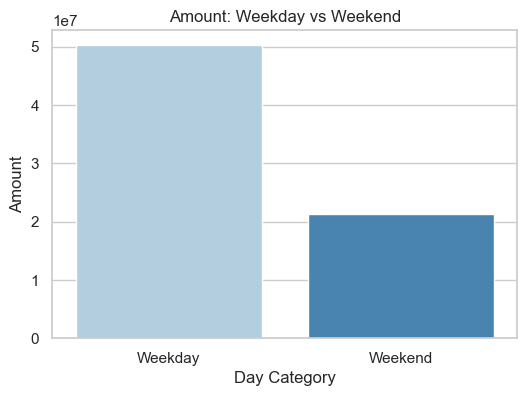

In [107]:
#Sum Sales Amount Weekday vs Weekend
plt.figure(figsize=(6,4))
sns.set_theme(style='whitegrid')
sns.barplot(x='day_category', y='Amount', data=sum_sales, palette='Blues', hue='day_category')
plt.title('Amount: Weekday vs Weekend')
plt.xlabel('Day Category')
plt.ylabel('Amount')
plt.show()

In [99]:
average_sales = df_daily.groupby('day_category').agg({
    'Qty': 'mean',
    'Amount': 'mean'
}).reset_index()

average_sales

,day_category,Qty,Amount
0,Weekday,1215.78125,785847.515625
1,Weekend,1263.00000,817988.538462


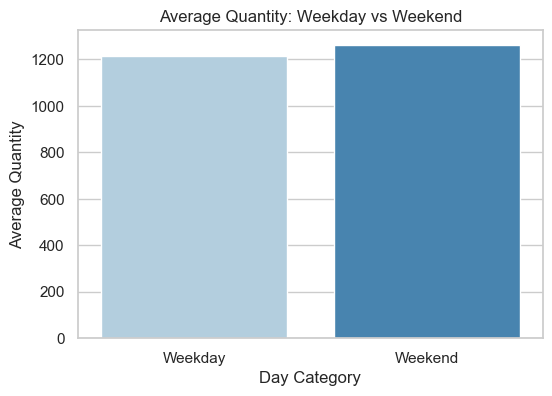

In [100]:
#Average Sales Quantity Weekday vs Weekend
plt.figure(figsize=(6,4))
sns.set_theme(style='whitegrid')
sns.barplot(x='day_category', y='Qty', data=average_sales, palette='Blues', hue='day_category')
plt.title('Average Quantity: Weekday vs Weekend')
plt.xlabel('Day Category')
plt.ylabel('Average Quantity')
plt.show()

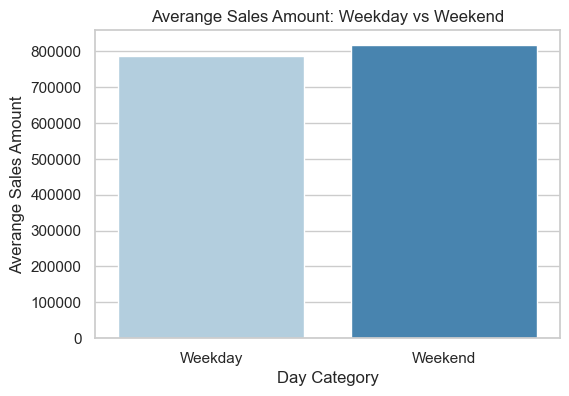

In [104]:
#Average Sales Amount Weekday vs Weekend
plt.figure(figsize=(6,4))
sns.set_theme(style='whitegrid')
sns.barplot(x='day_category', y='Amount', data=average_sales, palette='Blues', hue='day_category')
plt.title('Averange Sales Amount: Weekday vs Weekend')
plt.xlabel('Day Category')
plt.ylabel('Averange Sales Amount')
plt.show()

#### Looking at the calculations and charts, it can be concluded that there is a significant difference in sales volume and revenue when comparing weekdays to weekends. This was logical from the start, as there are five weekdays and only two weekend days. However, when we delve deeper into the averages of individual weekdays compared to the average of a single weekend day, it becomes clear that the quantity of goods sold and overall revenue on weekends is higher than that of individual weekdays. Therefore, it can be stated that there is generally more activity on weekends when comparing day to day.

In [ ]:
#the following public holidays were observed in India:

# Good Friday - April 15, 2022 (National)
# Maharashtra Day - May 1, 2022 (State-specific, applicable in Maharashtra)
# Buddha Purnima - May 16, 2022 (National)
# Eid al-Fitr - May 3, 2022 (Date may vary depending on lunar sightings, generally observed nationwide)


#### Approach: Finding if the sales on Holidays differ from sales on an avg day

In [112]:
# List of holiday dates in India, 2022, included in the dataset:
holidays = ['2022-04-15', '2022-05-01', '2022-05-16', '2022-05-03']

In [113]:
# Filter the dataset for holiday dates
holidays_sales = df[df['Date'].isin(holidays)]
holidays_sales.head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-country,promotion-ids,B2B,fulfilled-by,Year,day_of_week,Weekend,Month,day_category,Day
24538,24538,402-1594002-8513954,2022-04-15,Shipped,Amazon,Amazon.in,Expedited,JNE3735,JNE3735-KR-XS,kurta,...,IN,No Promotion,False,Not Available,2022,4,0,2022-04,Weekday,2022-04-15
24539,24539,171-2489850-4086760,2022-04-15,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Western Dress,...,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Not Available,2022,4,0,2022-04,Weekday,2022-04-15
24540,24540,404-3711822-4368345,2022-04-15,Shipped,Amazon,Amazon.in,Expedited,SET154,SET154-KR-NP-XS,Set,...,IN,No Promotion,False,Not Available,2022,4,0,2022-04,Weekday,2022-04-15


In [114]:
# Group by the 'date' to aggregate the total 'Amount' (Revenue) on each holiday
holidays_sales_grouped = holidays_sales.groupby('Date')['Amount'].sum().reset_index()
holidays_sales_grouped

,Date,Amount
0,2022-04-15,921690.0
1,2022-05-01,999686.0
2,2022-05-03,1086894.0
3,2022-05-16,683884.0


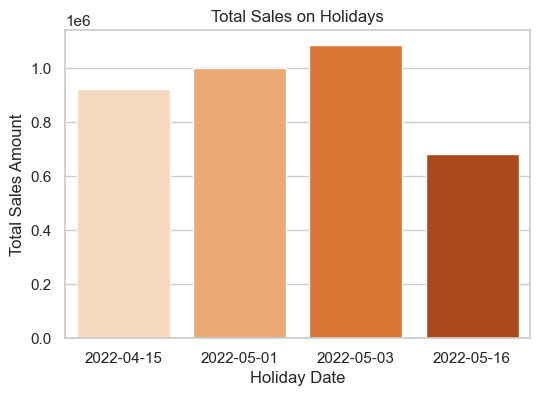

In [116]:
plt.figure(figsize=(6,4))
sns.barplot(x='Date', y='Amount', data=holidays_sales_grouped, palette='Oranges', hue='Date')
plt.title('Total Sales on Holidays')
plt.xlabel('Holiday Date')
plt.ylabel('Total Sales Amount')
plt.show()

In [125]:
daily_sales = df.groupby('Date', as_index=False)['Amount'].sum()
daily_sales['holiday_flag'] = daily_sales['Date'].apply(lambda x: 'Holiday' if x.strftime('%Y-%m-%d') in holidays else 'Non-Holiday')
print(daily_sales['holiday_flag'].value_counts())

holiday_flag
Non-Holiday    86
Holiday         4
Name: count, dtype: int64


In [128]:
# Calculate the mean sales for holidays vs non-holidays
avg_sales_holiday_vs_nonholiday = daily_sales.groupby('holiday_flag')['Amount'].mean().reset_index()

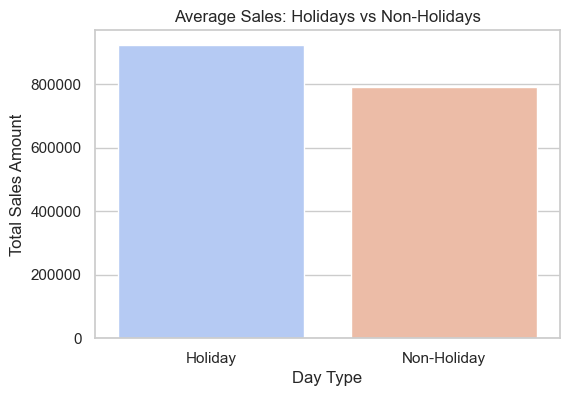

In [129]:
plt.figure(figsize=(6,4))
sns.barplot(x='holiday_flag', y='Amount', data=avg_sales_holiday_vs_nonholiday, palette='coolwarm', hue='holiday_flag')
plt.title('Average Sales: Holidays vs Non-Holidays')
plt.xlabel('Day Type')
plt.ylabel('Total Sales Amount')
plt.show()

In [130]:

avgerage_nonholiday_sales = daily_sales[daily_sales['holiday_flag'] == 'Non-Holiday']['Amount'].mean()
avgerage_nonholiday_sales

789183.5930232558

In [143]:
avgerage_holiday_sales = daily_sales[daily_sales['holiday_flag'] == 'Holiday']['Amount'].mean()
avgerage_holiday_sales

923038.5

In [147]:
print(f"Average Sales on Holidays are {round(avgerage_holiday_sales/avgerage_nonholiday_sales,4)*100}% of Non-Holidays Days")

Average Sales on Holidays are 116.96% of Non-Holidays Days


In [140]:
daily_sales[daily_sales['holiday_flag'] == 'Non-Holiday']['Amount'].max()

1104732.0

In [141]:
daily_sales[daily_sales['holiday_flag'] == 'Holiday']['Amount'].max()

1086894.0

#### From the latest analysis, it can be concluded that average sales on holidays account for approximately 117% of the average sales on non-holiday days, indicating a significant increase in sales during holidays. However, it is also evident that not all holidays have the same impact on consumer behavior. Specifically, during the public holidays in May, namely May 1st and May 3rd, there was a noticeable spike in sales, which was already visible in one of the earlier day-to-day sales charts. These two dates stand out even when compared to other holidays in terms of their effect on overall sales.

### KPIs

In [110]:
avg_qty = df['Qty'].mean()
avg_amount = df['Amount'].mean()

In [121]:
#Successfull delivieries:
sdr = len(df[df['Status'] == 'Shipped']) + len(df[df['Status'] == 'Shipped - Delivered to Buyer'])
success_delivery_rate = sdr / len(df) * 100

In [126]:
print(f'Averange quantity of sold products: {round(avg_qty,2)}')
print(f'Averange revenue of sold products: {round(avg_amount,2)}')
print(f'Succesfull delivery rate: {round(success_delivery_rate,2)}')

Averange quantity of sold products: 1.0
Averange revenue of sold products: 649.17
Succesfull delivery rate: 96.32


In [131]:
df['ship-city'].value_counts()

ship-city
BENGALURU       9889
HYDERABAD       6914
MUMBAI          5366
NEW DELHI       5008
CHENNAI         4667
                ... 
MUMBAI 40064       1
JAMADOBA           1
Lalganj            1
Bahaduargarh       1
Halol              1
Name: count, Length: 8346, dtype: int64

In [133]:
top5_cities = df['ship-city'].value_counts().head(5)


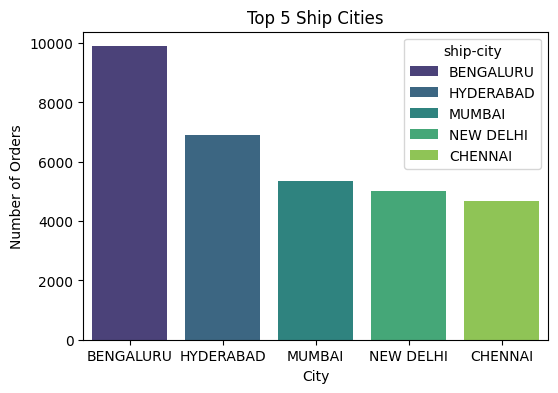

In [148]:
#Plotting the bar chart of top ship-cities
plt.figure(figsize=(6,4))
sns.barplot(x=top5_cities.index, y=top5_cities.values, hue=top5_cities.index, dodge=False, legend=True, palette='viridis' )
plt.title('Top 5 Ship Cities')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.show()

In [146]:
top5_categories = df['Category'].value_counts().head(5)

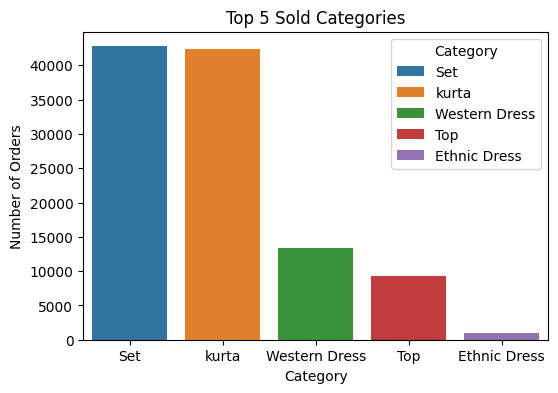

In [147]:
plt.figure(figsize=(6,4))
sns.barplot(x=top5_categories.index, y=top5_categories.values, hue=top5_categories.index, dodge=False, legend=True )
plt.title('Top 5 Sold Categories')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.show()

<Figure size 1200x800 with 0 Axes>

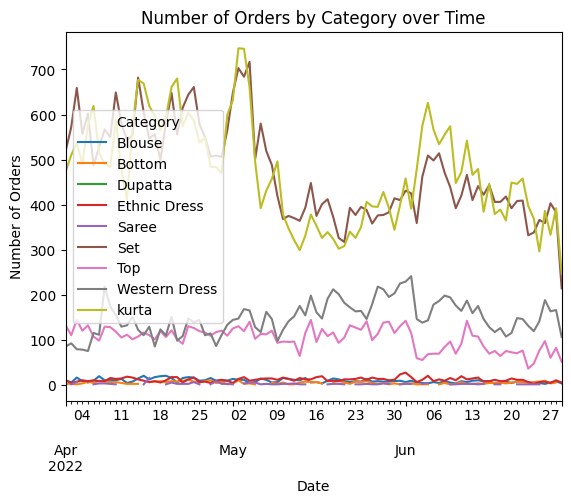

In [151]:
plt.figure(figsize=(12, 8))
df.groupby(['Date', 'Category']).size().unstack().plot(kind='line')
plt.title('Number of Orders by Category over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

In [153]:
fulfilment_rate = df['Fulfilment'].value_counts()

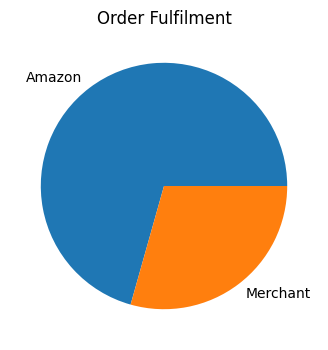

In [156]:
plt.figure(figsize=(6,4))
plt.pie(fulfilment_rate.values, labels=fulfilment_rate.index)
plt.title('Order Fulfilment')
plt.show()

In [157]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Month', 'Day'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

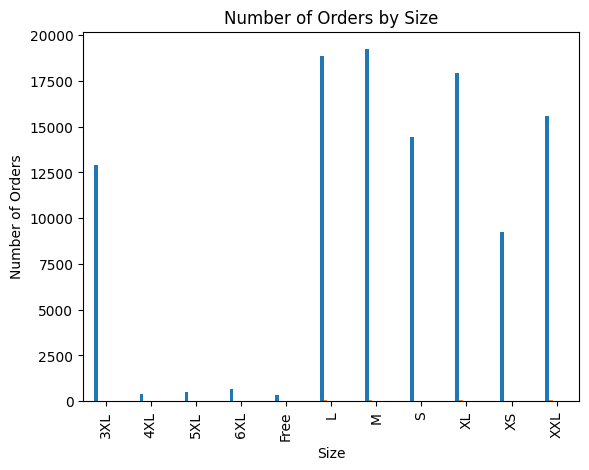

In [239]:
plt.figure(figsize=(12, 8))
df.groupby(['Size','Qty']).size().unstack().plot(kind='bar')
plt.title('Number of Orders by Size')
plt.xlabel('Size')
plt.ylabel('Number of Orders')
plt.legend().set_visible(False)
plt.show()

## Step 5: Model Building

#### I'll use time series forecasting methods since I'm predicting future sales based on historical data. Given the relatively small time frame (3 months of data), the model may not capture long-term trends, but it will give a solid framework for building models in the future.

In [171]:
# Split data into train and test based on the date
train = df[df['Date'] < '2022-06-01'] # April and May as a training date
test = df[df['Date'] >= '2022-06-01'] # June as a testing data

In [172]:
print('Training set size: ', train.shape)
print('Testing set data: ', test.shape)

Training set size:  (77913, 30)
Testing set data:  (32323, 30)


In [195]:
# Define features and target
features = ['day_of_week', 'Weekend', 'Qty']
target = 'Amount'

In [196]:
# Separate features and target for train and test sets
X_train = train[features]
X_test = test[target]

Y_train = train[features]
Y_test = test[target]

In [197]:
# Check the shape of the train and test sets
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_train shape: ', Y_train.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (77913, 3)
X_test shape:  (32323,)
Y_train shape:  (77913, 3)
Y_test shape:  (32323,)


In [198]:
# Initialize the Linear Regression model
model = LinearRegression()

In [199]:
Y_train.head()

,day_of_week,Weekend,Qty
1,5,1,1
2,5,1,1
4,5,1,1
5,5,1,1
6,5,1,1
